Class distribution before SMOTE: Counter({0: 500, 1: 268})
Class distribution after SMOTE: Counter({1: 500, 0: 500})
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Confusion Matrix:
 [[74 25]
 [12 89]]

Accuracy Score: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        99
           1       0.78      0.88      0.83       101

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



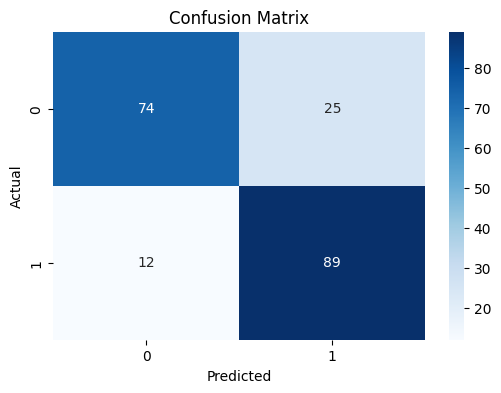

/tmp/ipython-input-9-788644768.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


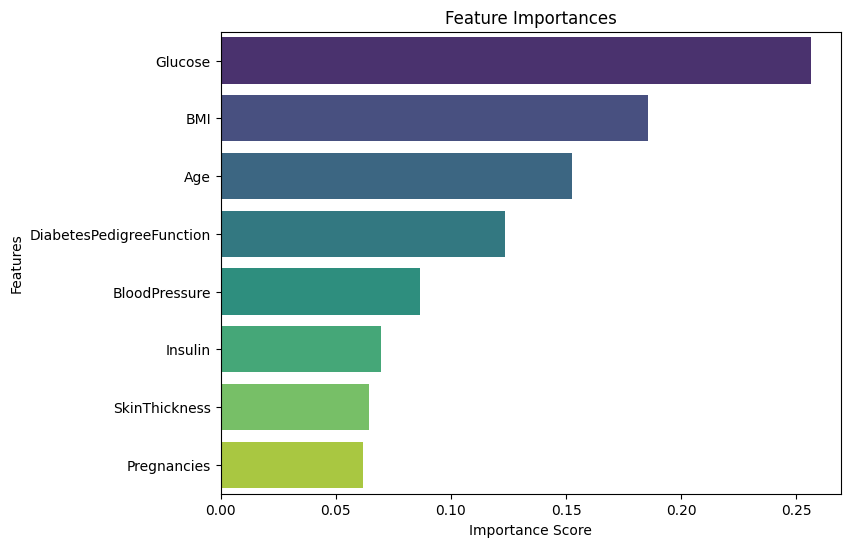

In [ ]:
# 📍 Install if needed
!pip install -q imbalanced-learn

# 📍 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# 📍 Load the synthetic dataset (upload to Colab first or use below if already present)
df = pd.read_csv('/content/diabetes.csv')

# 📍 Separate features & target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Class distribution before SMOTE:", Counter(y))

minority_class_count = min(Counter(y).values())
k_neighbors = min(5, minority_class_count - 1) if minority_class_count > 1 else 1

# 📍 Balance the dataset
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X, y = smote.fit_resample(X, y)

print("Class distribution after SMOTE:", Counter(y))

# 📍 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 📍 Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📍 Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# 📍 Train best model & predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# 📍 Evaluate the model
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("\nConfusion Matrix:\n", cm)
print(f"\nAccuracy Score: {acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 📍 Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 📍 Feature Importance
feature_importances = pd.Series(
    best_model.feature_importances_, index=df.columns[:-1]
).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
